In [1]:
# Libraries in active development
# MDIData is a helper library to ease handling the way data is split across years

# Environment
%cd /kt/data/massdot-impact
%load_ext autoreload
%autoreload
from massdot_impact import MDIData
mdi = MDIData('./raw')

/kt/data/massdot-impact


In [72]:
import pandas
import geopandas
import numpy
from matplotlib import pyplot as plt

In [4]:
ehsa_norm =   geopandas.read_file('proc/arc-emerging-hotspot-analysis/mdi_ehsa_norm100k.shp')
ehsa_nonorm = geopandas.read_file('proc/arc-emerging-hotspot-analysis/mdi_ehsa_nonorm.shp')

In [6]:
ehsa_norm.columns

Index(['LOCATION', 'LOGSF1', 'CATEGORY', 'PATTERN', 'PERC_HOT', 'PERC_COLD',
       'TREND_Z', 'TREND_P', 'TREND_BIN', 'SUM_VALUE', 'MIN_VALUE',
       'MAX_VALUE', 'MEAN_VALUE', 'STD_VALUE', 'MED_VALUE', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')

In [9]:
ehsa_norm.head

<bound method NDFrame.head of       LOCATION  LOGSF1  CATEGORY              PATTERN   PERC_HOT  PERC_COLD  \
0            0  137632         0  No Pattern Detected   0.000000        0.0   
1            1  137634         0  No Pattern Detected   0.000000        0.0   
2            2  137636         0  No Pattern Detected   0.000000        0.0   
3            3  137459         0  No Pattern Detected   0.000000        0.0   
4            4  137460         0  No Pattern Detected   0.000000        0.0   
...        ...     ...       ...                  ...        ...        ...   
4974      4974  107370         6    Sporadic Hot Spot  77.777778        0.0   
4975      4975  107372         0  No Pattern Detected  11.111111        0.0   
4976      4976  107233         6    Sporadic Hot Spot  50.000000        0.0   
4977      4977  107237         6    Sporadic Hot Spot  33.333333        0.0   
4978      4978  107235         6    Sporadic Hot Spot  22.222222        0.0   

       TREND_Z   TREN

In [8]:
ehsa_norm.PATTERN

0       No Pattern Detected
1       No Pattern Detected
2       No Pattern Detected
3       No Pattern Detected
4       No Pattern Detected
               ...         
4974      Sporadic Hot Spot
4975    No Pattern Detected
4976      Sporadic Hot Spot
4977      Sporadic Hot Spot
4978      Sporadic Hot Spot
Name: PATTERN, Length: 4979, dtype: object

In [39]:
ehsa_norm_trim = pandas.DataFrame(ehsa_norm[['LOGSF1','PATTERN']])
ehsa_norm_trim.set_index('LOGSF1',inplace=True)
ehsa_norm_trim.columns = ['pattern_before']

ehsa_nonorm_trim = pandas.DataFrame(ehsa_nonorm[['LOGSF1','PATTERN']])
ehsa_nonorm_trim.set_index('LOGSF1',inplace=True)
ehsa_nonorm_trim.columns = ['pattern_after']

ehsa_norm_trim

,pattern_before
LOGSF1,
137632,No Pattern Detected
137634,No Pattern Detected
137636,No Pattern Detected
137459,No Pattern Detected
137460,No Pattern Detected
...,...
107370,Sporadic Hot Spot
107372,No Pattern Detected
107233,Sporadic Hot Spot


Axis labels for the plot

In [144]:
labels = [
    'New Hot Spot',
    'Intensifying Hot Spot',
    'Persistent Hot Spot',
    'Consecutive Hot Spot',
    'Sporadic Hot Spot',
    'Diminishing Hot Spot',
    'Historical Hot Spot',
    'No Pattern'
]

labels_short = [lab.replace(' Hot Spot','') for lab in labels]

In [74]:
ehsa_join = ehsa_norm_trim.join(ehsa_nonorm_trim)

ehsa_join['change_matrix_coord'] = ehsa_join.apply(
    lambda r: (labels.index(r.pattern_before),
               labels.index(r.pattern_after)),
    axis=1)

ehsa_join

,pattern_before,pattern_after,change_matrix_coord
LOGSF1,,,
137632,No Pattern Detected,No Pattern Detected,"(7, 7)"
137634,No Pattern Detected,No Pattern Detected,"(7, 7)"
137636,No Pattern Detected,No Pattern Detected,"(7, 7)"
137459,No Pattern Detected,No Pattern Detected,"(7, 7)"
137460,No Pattern Detected,No Pattern Detected,"(7, 7)"
...,...,...,...
107370,Sporadic Hot Spot,Sporadic Hot Spot,"(4, 4)"
107372,No Pattern Detected,No Pattern Detected,"(7, 7)"
107233,Sporadic Hot Spot,Sporadic Hot Spot,"(4, 4)"


In [87]:
print(set(ehsa_join.pattern_before.tolist()))
print(set(ehsa_join.pattern_after.tolist()))

{'No Pattern Detected', 'Sporadic Hot Spot', 'New Hot Spot', 'Consecutive Hot Spot', 'Diminishing Hot Spot', 'Persistent Hot Spot', 'Intensifying Hot Spot', 'Historical Hot Spot'}
{'No Pattern Detected', 'Sporadic Hot Spot', 'New Hot Spot', 'Consecutive Hot Spot', 'Persistent Hot Spot', 'Intensifying Hot Spot', 'Historical Hot Spot'}


In [109]:
len(ehsa_join[ehsa_join.change_matrix_coord == (7,7)])

4251

In [111]:
numpy.zeros((8,8), dtype='int')

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [112]:
change_matrix = numpy.zeros([8,8], dtype='int')

foo=0

for index,row in ehsa_join.iterrows():
    change_matrix[row.change_matrix_coord] += 1
    foo += 1
    
print(change_matrix)
print(change_matrix.sum())
print(foo)

[[   3    0    0    4    6    0    0   13]
 [   0   43    0    8    5    0    0    0]
 [   0   31   20    4   13    0    0    1]
 [   5    5    1   85   33    0    0   20]
 [   4    4    6   33  155    0    0   68]
 [   0    0    3    0    1    0    0    0]
 [   0    0    1    0    0    0    4    3]
 [   9    2    2   41   92    0    0 4251]]
4979
4979


In [164]:
def highlight_cell(x,y, ax=None, **kwargs):
    rect = plt.Rectangle((x-.5, y-.5), 1,1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect

In [183]:
axlabel_before = 'Hotspot category before normalization'
axlabel_after = 'Hotspot category after normalization'

In [262]:
def grid_fig(arr,
             shade_arr,
             fig_title,
             labs,
             axlab_y,
             axlab_x,
             lab_white_thresh,
             outpath):
    
    fig, ax = plt.subplots(figsize=(6,6)) # Hard coded

    ax.matshow(shade_arr, cmap=plt.cm.OrRd)

    for i in range(8):
        for j in range(8):
            c = arr[j,i]
            lab_col = 'white' if c>lab_white_thresh else 'black'
            ax.text(i, j, str(c), va='center', ha='center', c=lab_col)

    ax.set_yticklabels(['']+labs, rotation='horizontal')

    ax.set_ylabel(axlab_y+'\n')
    ax.axes.get_xaxis().set_visible(False)

    # Move the axis and labels to the top
    secax = ax.secondary_xaxis('top')
    secax.set_xlabel(axlab_x+'\n')
    secax.set_xticklabels(['']+labs, rotation='vertical')
    secax.set_xticks(numpy.arange(-1,8,1)) # Hard coded dims!
    
    ax.set_title(fig_title)


    # Create the rectangle for everythign that kept its original classification
    # These don't quite line up, but it's good enough for a small figure
    for i in range(8): highlight_cell(i,i, color="black", linewidth=1) # More hard coding!

    plt.tight_layout()
    plt.savefig(outpath)
    plt.show()

/tmp/ipykernel_1374303/2977732366.py:2: RuntimeWarning: divide by zero encountered in log10
  shade_arr = numpy.log10(change_matrix),
/tmp/ipykernel_1374303/290445816.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+labs, rotation='horizontal')
/tmp/ipykernel_1374303/290445816.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  secax.set_xticklabels(['']+labs, rotation='vertical')


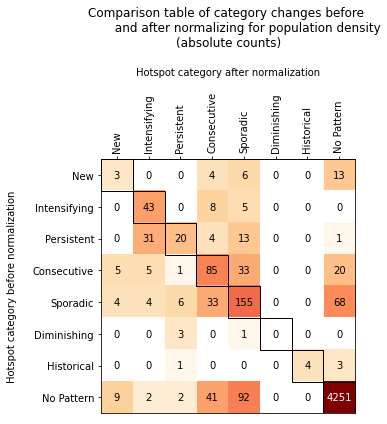

/tmp/ipykernel_1374303/290445816.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+labs, rotation='horizontal')
/tmp/ipykernel_1374303/290445816.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  secax.set_xticklabels(['']+labs, rotation='vertical')


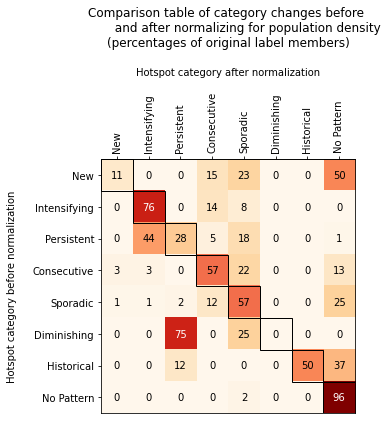

In [267]:
grid_fig(change_matrix,
         shade_arr = numpy.log10(change_matrix),
         fig_title = 'Comparison table of category changes before \n \
         and after normalizing for population density\n(absolute counts)\n',
         labs = labels_short,
         axlab_y = axlabel_before,
         axlab_x = axlabel_after,
         lab_white_thresh=1000,
         outpath = 'notebooks/fig-out/before-after-counts-abs.pdf')

change_proportions = numpy.array(100*change_matrix/change_matrix.sum(axis=1)[:,None], dtype="int")

grid_fig(change_proportions,
         shade_arr = change_proportions,
         fig_title='Comparison table of category changes before \n \
         and after normalizing for population density\n(percentages of original label members)\n',
         labs = labels_short,
         axlab_y = axlabel_before,
         axlab_x = axlabel_after,
         lab_white_thresh = 65,
         outpath = 'notebooks/fig-out/before-after-counts-pct.pdf')